In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# support dimensions as modeled in solidworks
L = 4 # height of support, in inches
w = 0.88 # width of the support cross-section at the middle point, in inches
t = [1/32., 1/16., 3/32., 1/8., 3/16., 1/4., 3/8., 1/2., 5/8., 3/4., 1., 5/4., 3/2., 2.] # G10 thicknesses available from McMaster Carr
# material properties of G10
E = 1.74e6 # modulus of elasticity, in psi
yield_strength = 9430 # yield strength, in psi

In [3]:
# moment of inertia of a rectangular cross-section of sides w and t
def moment_of_inertia(w, t):
    I = w*np.power(t, 3)/12
    return I

In [4]:
# critical load for a column of dimensions w/t/L and modulus of elasticity E
def critical_load(E, L, w, t):
    I = moment_of_inertia(w, t)
    p_cr = np.pi**2 * E * I /(L**2)
    return p_cr

In [10]:
# maximum bending moment of an eccentrically loaded column
def max_bending_moment(E, L, w, t, p_tot, ecc):
    I = moment_of_inertia(w, t)
    a = w*t
    r = np.sqrt(I/a)
    p_cr = critical_load(E, L, w, t)
    arg = (np.pi/2.)*np.sqrt(p_tot/p_cr)
    M_max = p_tot*ecc/np.cos(arg)
    return I, a, r, p_cr, M_max

In [29]:
# maximum compressive stress experienced by the column for a load p_tot at a given distance from the center of the cross-section ecc
def max_compressive_stress(E, L, w, t, p_tot, ecc):
    I, a, r, p_cr, M_max = max_bending_moment(E, L, w, t, p_tot, ecc)
    c = t/2.
    sigma_max = p_tot/a + M_max*c/I
    return sigma_max, p_cr/a

In [33]:
# calculates the factor of safety for a given maximum stress
def factor_of_safety(allowable_stress, maximum_stress):
    return allowable_stress/maximum_stress

In [34]:
# calculate the factor of safety for each thickness
# assumes a 30lb load 1.03in away from the center of the support cross-section
max_stresses = []
critical_stresses = []
fos = []
for thickness in t:
    maximum_stress, critical_stress = max_compressive_stress(E, L, w, thickness, 30, 1.03)
    critical_stresses.append(critical_stress)
    max_stresses.append(maximum_stress)
    fos.append(factor_of_safety(yield_strength, maximum_stress))

Text(0.5, 1.0, 'Factor of Safety for G10 Supports')

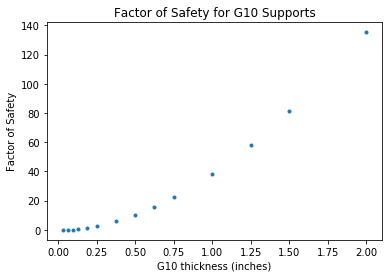

In [41]:
plt.scatter(t, fos, marker='.')
plt.xlabel('G10 thickness (inches)')
plt.ylabel('Factor of Safety')
plt.title('Factor of Safety for G10 Supports')

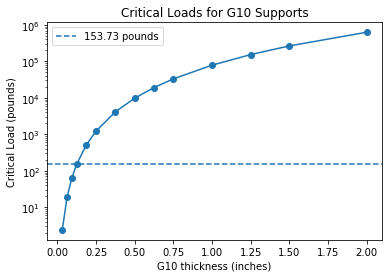

In [59]:
plt.semilogy(x, y, marker='o')
plt.axhline(y[3], ls = '--', label=str(np.round(y[3], 2))+' pounds')
plt.legend()
plt.xlabel('G10 thickness (inches)')
plt.ylabel('Critical Load (pounds)')
plt.title('Critical Loads for G10 Supports')
plt.savefig('C:\\Users\jemoor15\Desktop\pcr.pdf')

In [305]:
E = 1.74e6 # psi
L = 4.0 # in
w = 0.88 # in
max_stress = []
yield_strength = 9430 # psi
distance = 1.03
load = 30
sigma_critical=[]
for i in t:
    sigma_max = max_comp(E, L, w, i, load, distance)
    max_stress.append(sigma_max)
    sigma_critical.append(critical_load(E, L, w, i)/(w*i))

41.539077507760545
-80.90863402873522
64.16351038928592
40.19490191407155
33.24332039967718
31.85381156385905
31.177589990583517
31.016603745989578
30.95960965193092
30.934472980110602
30.914535476230224
30.90744074045485
30.904305620063635
30.901816311535534


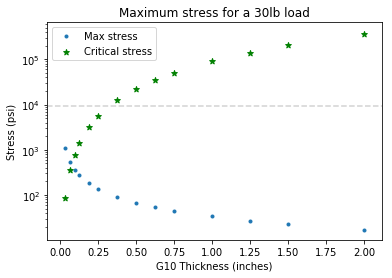

In [342]:
plt.semilogy(t, max_stress, marker='.', lw=0, label='Max stress')
# for i in t:
#     plt.axvline(i, ls = '--', color='lightgray')
plt.axhline(yield_strength, ls ='--', color='lightgray')
plt.scatter(t, sigma_critical, marker = '*', label='Critical stress', color = 'green')
# plt.scatter(t, sig_yield, marker = 'x', label='Yield stress', color = 'red')
plt.xlabel('G10 Thickness (inches)')
plt.ylabel('Stress (psi)')
plt.title('Maximum stress for a 30lb load')
plt.legend()
plt.savefig('C:\\Users\jemoor15\Desktop\stress.pdf')

In [ ]:
def yield_stress(max_stress, w, t, L